In [1]:
import numpy as np
import sys
sys.path.insert(0, '/home/ernie/ssd/caffe/python')
import caffe
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
caffe.set_mode_cpu()
#caffe.set_device(0)
ssd_pt = '/home/ernie/ssd/caffe/models/VGGNet/VOC0712/SSD_300x300_speed/deploy.prototxt'
ssd_md = '/home/ernie/ssd/caffe/models/VGGNet/VOC0712/SSD_300x300/VGG_VOC0712_SSD_300x300_iter_120000.caffemodel'
net = caffe.Net(ssd_pt, ssd_md, caffe.TEST)

In [3]:
ssd_img = './fish-bike.jpg'
image = caffe.io.load_image(ssd_img)

transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2, 0, 1))
transformer.set_mean('data', np.array([104,117,123])) # mean pixel
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2,1,0))
image_resize = 300
net.blobs['data'].reshape(1,3,image_resize,image_resize)
image = caffe.io.load_image(ssd_img)
transformed_image = transformer.preprocess('data', image)
net.blobs['data'].data[...] = transformed_image

In [4]:
detections = net.forward()['detection_out']

In [5]:
# Parse the outputs.
det_label = detections[0,0,:,1]
det_conf = detections[0,0,:,2]
det_xmin = detections[0,0,:,3]
det_ymin = detections[0,0,:,4]
det_xmax = detections[0,0,:,5]
det_ymax = detections[0,0,:,6]

# Get detections with confidence higher than 0.6.
top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

top_conf = det_conf[top_indices]
top_label_indices = det_label[top_indices].tolist()
top_xmin = det_xmin[top_indices]
top_ymin = det_ymin[top_indices]
top_xmax = det_xmax[top_indices]
top_ymax = det_ymax[top_indices]

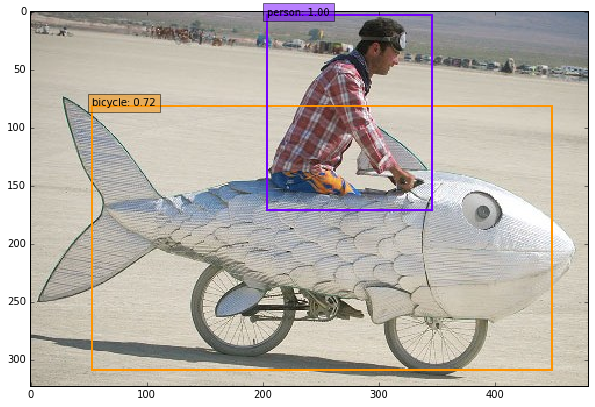

In [6]:
CLASSES = ('__background__', 
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')

plt.imshow(image)
currentAxis = plt.gca()
colors = plt.cm.hsv(np.linspace(0, 1, len(CLASSES))).tolist()

for i in xrange(top_conf.shape[0]):
    xmin = int(round(top_xmin[i] * image.shape[1]))
    ymin = int(round(top_ymin[i] * image.shape[0]))
    xmax = int(round(top_xmax[i] * image.shape[1]))
    ymax = int(round(top_ymax[i] * image.shape[0]))
    score = top_conf[i]
    label = int(top_label_indices[i])
    display_txt = '%s: %.2f'%(CLASSES[label], score)
    coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
    color = colors[label]
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

In [7]:
# gpu
import time
start = time.time()
for i in range(1000):
    net.forward()
end = time.time()
print "runing time is {:.3f}".format((end - start) / 1000.)

runing time is 0.041


In [5]:
# cpu
import time
start = time.time()
for i in range(100):
    net.forward()
end = time.time()
print "runing time is {:.3f}".format((end - start) / 100.)

runing time is 3.212
